In [1]:
import time
import pandas as pd
import zipfile

chunk_size = 60000

# Initialize an empty list to store the chunks
processed_data = []

# Path to the zip file and the CSV file inside it
zip_path = r"C:/Users/siidh/Documents/Mswasth/consult_details_all_partner_data/consult_det_report_gen.zip"
csv_filename = "consult_det_report_gen.csv"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Open the CSV file inside the zip file
    with z.open(csv_filename) as f:
        # Read the specified rows in chunks from the CSV file
        for chunk in pd.read_csv(f, sep='|', encoding='windows-1252', encoding_errors='ignore', on_bad_lines='skip', chunksize=chunk_size):
            print("added chunk")
            processed_data.append(chunk)

    # Reset the pointer to the beginning of the CSV file for the header read
    with z.open(csv_filename) as f:
        headers = pd.read_csv(f, nrows=1, sep='|')

# Concatenate the chunks into a single DataFrame
processed_df_1 = pd.concat(processed_data)
processed_df_1.columns = headers.columns
print('Processing data...')


added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk


C:\Users\siidh\AppData\Local\Temp\ipykernel_25464\2092164984.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, sep='|', encoding='windows-1252', encoding_errors='ignore', on_bad_lines='skip', chunksize=chunk_size):


added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk


C:\Users\siidh\AppData\Local\Temp\ipykernel_25464\2092164984.py:19: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, sep='|', encoding='windows-1252', encoding_errors='ignore', on_bad_lines='skip', chunksize=chunk_size):


added chunk
added chunk
added chunk
added chunk
added chunk
added chunk


C:\Users\siidh\AppData\Local\Temp\ipykernel_25464\2092164984.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, sep='|', encoding='windows-1252', encoding_errors='ignore', on_bad_lines='skip', chunksize=chunk_size):


added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
Processing data...


In [2]:

processed_df_1.head()

,Date,Product,Channel,EMR#,Consultation #,Mobile #,Member #,Type,Status,Patient Gender,...,Doctor,Chief Complaint,Diagnosis,Advice,REFERRED,Lab Tests,Medicine,Clinic Name,Prescrption json,ICD Code
0,2020-05-15,M-Swasth Doctor - FREE,CashPor,1,1,7571029662,21:01:84:01:25,CALL,DONE,M,...,SATISH,Other,.,referred to higher centre,NO,NaN,NO,NaN,"{""pres"":[]}",.
1,2021-06-10,M-Swasth Doctor - FREE,CashPor,1,47576,7571029662,21:01:84:01:25,CALL,DONE,M,...,KADAMBARI,Other,Dysmenorrhea and menorrhagia,Advised not miss a single tablet of Ovral l\nD...,NO,NaN,YES,NaN,"{""pres"":[{""mName"":""Tab Ovral L"",""m"":"""",""a"":"""",...",NONE
2,2021-06-11,M-Swasth Doctor - FREE,CashPor,1,48043,7571029662,21:01:84:01:25,CALL,DONE,M,...,NIKHIL,Other,C/o Weakness with loss of appetite,"Eat healthy food , green vegetables and fruits...",NO,NaN,YES,NaN,"{""pres"":[{""mName"":""Multiprex Cap"",""m"":""1"",""a"":...",NONE
3,2021-06-11,M-Swasth Doctor - FREE,CashPor,1,48603,7571029662,21:01:84:01:25,CALL,DONE,M,...,ravindra,Other,pain,Take nutritious diet\nDo Excercise regularly\n...,NO,CBC,YES,NaN,"{""pres"":[{""mName"":""Paracetamol 500mg Tab"",""m"":...",R50
4,2021-06-16,M-Swasth Doctor - FREE,CashPor,1,52282,7571029662,21:01:84:01:25,CALL,DONE,M,...,Harinder Pal,Other Pain,Gall Stones,Referred to nearby hospital for surgical consu...,YES,Ultrasound,NO,NaN,"{""pres"":[]}",K87


CLEANING DATA

In [3]:
column_to_clean = 'Diagnosis'

processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('?', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('C/O', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('C/o', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('c/o', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('H/O', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('H/O', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('K/C/O HTN', '')
processed_df_1['Diagnosis'] = processed_df_1['Diagnosis'].replace(r'\\n', ',', regex=True).replace(r'\n', ',', regex=True)
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('u/E', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('U/E', '')

In [4]:
processed_df_1.head()

,Date,Product,Channel,EMR#,Consultation #,Mobile #,Member #,Type,Status,Patient Gender,...,Doctor,Chief Complaint,Diagnosis,Advice,REFERRED,Lab Tests,Medicine,Clinic Name,Prescrption json,ICD Code
0,2020-05-15,M-Swasth Doctor - FREE,CashPor,1,1,7571029662,21:01:84:01:25,CALL,DONE,M,...,SATISH,Other,.,referred to higher centre,NO,NaN,NO,NaN,"{""pres"":[]}",.
1,2021-06-10,M-Swasth Doctor - FREE,CashPor,1,47576,7571029662,21:01:84:01:25,CALL,DONE,M,...,KADAMBARI,Other,Dysmenorrhea and menorrhagia,Advised not miss a single tablet of Ovral l\nD...,NO,NaN,YES,NaN,"{""pres"":[{""mName"":""Tab Ovral L"",""m"":"""",""a"":"""",...",NONE
2,2021-06-11,M-Swasth Doctor - FREE,CashPor,1,48043,7571029662,21:01:84:01:25,CALL,DONE,M,...,NIKHIL,Other,Weakness with loss of appetite,"Eat healthy food , green vegetables and fruits...",NO,NaN,YES,NaN,"{""pres"":[{""mName"":""Multiprex Cap"",""m"":""1"",""a"":...",NONE
3,2021-06-11,M-Swasth Doctor - FREE,CashPor,1,48603,7571029662,21:01:84:01:25,CALL,DONE,M,...,ravindra,Other,pain,Take nutritious diet\nDo Excercise regularly\n...,NO,CBC,YES,NaN,"{""pres"":[{""mName"":""Paracetamol 500mg Tab"",""m"":...",R50
4,2021-06-16,M-Swasth Doctor - FREE,CashPor,1,52282,7571029662,21:01:84:01:25,CALL,DONE,M,...,Harinder Pal,Other Pain,Gall Stones,Referred to nearby hospital for surgical consu...,YES,Ultrasound,NO,NaN,"{""pres"":[]}",K87


In [5]:
processed_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990682 entries, 0 to 4990681
Data columns (total 21 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Date              object
 1   Product           object
 2   Channel           object
 3   EMR#              object
 4   Consultation #    object
 5   Mobile #          object
 6   Member #          object
 7   Type              object
 8   Status            object
 9   Patient Gender    object
 10  FEMALE DOC ONLY   object
 11  Doctor            object
 12  Chief Complaint   object
 13  Diagnosis         object
 14  Advice            object
 15  REFERRED          object
 16  Lab Tests         object
 17  Medicine          object
 18  Clinic Name       object
 19  Prescrption json  object
 20  ICD Code          object
dtypes: object(21)
memory usage: 799.6+ MB


In [22]:
processed_df_1["Channel"].value_counts()

GATHERING DATA WITH CHANNEL NAME MUTHOOT

In [23]:
 # Making a copy to avoid modifying the original DataFrame
data=processed_df_1[["Date","Clinic Name","Channel","Prescrption json"]]

uttrayan = data[data['Channel'].str.contains('Uttrayan', case=False, na=False)]

# Assuming 'processed_df_1' is your DataFrame
data = uttrayan.copy()


In [24]:
data.shape

(69664, 4)

In [25]:
import pandas as pd

# Sort the DataFrame by the 'Date' column in ascending order
data_sorted = data.sort_values(by='Date')

# Display the sorted DataFrame
data_sorted

,Date,Clinic Name,Channel,Prescrption json
19767,2021-03-16,NaN,Uttrayan,"{""pres"":[{""mName"":""evion 400"",""m"":""1"",""a"":"""",""..."
19768,2021-03-16,NaN,Uttrayan,"{""pres"":[{""mName"":""CALCIUM 500 mg+ CALCITRIOL ..."
19769,2021-03-16,NaN,Uttrayan,"{""pres"":[{""mName"":""Albendazole 400mg Tabs,repe..."
22449,2021-03-30,NaN,Uttrayan,"{""pres"":[{""mName"":""tab Zerodol SP(SOS)"",""m"":""1..."
22456,2021-03-30,NaN,Uttrayan,"{""pres"":[{""mName"":""Vitamin B Complex with Vita..."
...,...,...,...,...
2809169,2024-05-22,ECUR010\tNabadwip Nadia West Bengal,Uttrayan,"{""pres"":[{""dur"":""3"",""a"":"""",""bf"":false,""e"":"""",""..."
2667669,2024-05-22,ECUR008 LALGANJ BIHAR,Uttrayan,"{""pres"":[{""dur"":""5"",""isTubeBottle"":true,""a"":""2..."
2626087,2024-05-22,ECUR002 Barasat north 24 pargana,Uttrayan,"{""pres"":[{""dur"":""3"",""a"":"""",""bf"":false,""e"":"""",""..."
4985416,2024-05-22,ECUR004 RAGHUNATHGANJ Murshidabad,Uttrayan,NaN


In [26]:
# Count occurrences of medicines
medicine_counts = data['Clinic Name'].value_counts()

# Display the result
print("Clinic Counts:")
print(medicine_counts)


Clinic Counts:
Clinic Name
ECUR005 Bihar Begusarai Teghra       6792
ECUR001 AMTALA SOUTH 24 PARGANAS     3882
ECUR002 Barasat north 24 pargana     3868
ECUR003 Behrampur Murshidabad        3520
ECUR004 RAGHUNATHGANJ Murshidabad    3462
                                     ... 
EC21:12 Bochahan Muzaffarpur            1
EC10:18 Garkha Saran                    1
EC22:23 Pachpakadi East Champaran       1
EC15:06 Shahganj Sonbhadra              1
ECVF001 Pancharul Howrah                1
Name: count, Length: 85, dtype: int64


LOADING THE JSON DATA AND ORGANISING THEM TO TABLE

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69664 entries, 19767 to 4990383
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              69664 non-null  object
 1   Clinic Name       44816 non-null  object
 2   Channel           69664 non-null  object
 3   Prescrption json  63559 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [28]:
#df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)

In [29]:
data["Date"]=data["Date"].astype("str")

In [30]:
data[data.Date=="2021-05-14"]

,Date,Clinic Name,Channel,Prescrption json


In [31]:
filtered_data = data[data["Date"] == "2021-05-14"]
result = filtered_data[["Prescrption json"]]
result.values

array([], shape=(0, 1), dtype=object)

In [32]:
#prescription details of muthoot channel
import pandas as pd
import json

# Sample DataFrame with 'Prescription Json' column
# Replace this with your actual DataFrame

# Define a function to extract medication details
def extract_medication_details(prescription,clinic,date):
    med_details = []
    if isinstance(prescription, str):
        try:
            prescriptions = json.loads(prescription)['pres']
            for prescription in prescriptions:
                med_name = prescription.get('mName', '')
                duration = prescription.get('dur', '')
                morning = 1 if prescription.get('m') else 0
                afternoon = 1 if prescription.get('a') else 0
                evening = 1 if prescription.get('e') else 0
                night = 1 if prescription.get('n') else 0
                frequency = prescription.get('freq', '')
                med_details.append((med_name, duration, morning, afternoon, evening, night, frequency,clinic,date))
        except (json.JSONDecodeError, KeyError):
            pass  # Skip non-JSON entries or entries with missing keys
    return med_details

# Apply the function to each row and expand the result into separate columns
medication_details = data.apply(lambda x: extract_medication_details(x["Prescrption json"], x["Clinic Name"],x.Date), axis=1)
medication_df = pd.DataFrame(medication_details.explode().tolist(), columns=['Medicine Name', 'Duration', 'Morning', 'Afternoon', 'Evening', 'Night', 'Frequency',"Clinic Name","Date"])
medication_df



,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
0,evion 400,30,1.0,0.0,0.0,0.0,d,NaN,2021-03-16
1,cremaffin pink,30,0.0,0.0,0.0,1.0,d,NaN,2021-03-16
2,CALCIUM 500 mg+ CALCITRIOL 0.25 mg Tablets,20,1.0,0.0,0.0,0.0,d,NaN,2021-03-16
3,Vitamin B Complex with Vitamin C & Zinc (Cebe...,20,0.0,1.0,0.0,0.0,d,NaN,2021-03-16
4,Diclofenac Gel,10,1.0,0.0,0.0,1.0,d,NaN,2021-03-16
...,...,...,...,...,...,...,...,...,...
206482,STREPSILS,2,1.0,1.0,1.0,1.0,d,ECUR021\tWest Bengal Malda\tHARISHCHANDRAPUR,2024-05-22
206483,OMEZ,5,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22
206484,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR009 Haridwar,2024-05-22
206485,Unizyme,5,0.0,1.0,0.0,1.0,d,ECUR009 Haridwar,2024-05-22


In [33]:
medication_df.dropna(inplace=True)
medication_df.shape

(144361, 9)

In [34]:
medication_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
11,Tab. VERTIN 16 MG,3,1.0,1.0,0.0,1.0,d,ECUR006 WestBengal Malda Mothabari,2022-07-14
12,Cap.. Becosules Women,15,0.0,1.0,0.0,0.0,d,ECUR006 WestBengal Malda Mothabari,2022-07-14
129,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
130,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
131,Cap Becosule,10,0.0,1.0,0.0,0.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
...,...,...,...,...,...,...,...,...,...
206482,STREPSILS,2,1.0,1.0,1.0,1.0,d,ECUR021\tWest Bengal Malda\tHARISHCHANDRAPUR,2024-05-22
206483,OMEZ,5,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22
206484,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR009 Haridwar,2024-05-22
206485,Unizyme,5,0.0,1.0,0.0,1.0,d,ECUR009 Haridwar,2024-05-22


In [35]:
import pandas as pd
import calendar as cal

def parse_date(date_str):
    date_str = date_str.replace(' ', '-')
    date_str = date_str.replace('/', '-')
    date_str = date_str.replace('.', '-')

    formats = [
        '%Y-%m-%d', '%d-%m-%Y', '%m-%d-%Y', '%Y-%b-%d', '%d-%b-%Y', '%b-%d-%Y',
        '%Y-%B-%d', '%d-%B-%Y', '%B-%d-%Y'
    ]

    for fmt in formats:
        try:
            d = pd.to_datetime(date_str, format=fmt)
            # If date is valid but falls on an invalid leap year date, continue to next format
            if d.month == 2 and d.day == 29 and not cal.isleap(d.year):
                continue
            return d.strftime('%Y:%m:%d')
        except ValueError:
            pass
    return pd.NaT





In [36]:
medication_df['Date'] = medication_df['Date'].apply(parse_date)


medication_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
11,Tab. VERTIN 16 MG,3,1.0,1.0,0.0,1.0,d,ECUR006 WestBengal Malda Mothabari,2022:07:14
12,Cap.. Becosules Women,15,0.0,1.0,0.0,0.0,d,ECUR006 WestBengal Malda Mothabari,2022:07:14
129,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023:11:06
130,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023:11:06
131,Cap Becosule,10,0.0,1.0,0.0,0.0,d,ECUR024 Kharupetia Darrang Assam,2023:11:06
...,...,...,...,...,...,...,...,...,...
206482,STREPSILS,2,1.0,1.0,1.0,1.0,d,ECUR021\tWest Bengal Malda\tHARISHCHANDRAPUR,2024:05:22
206483,OMEZ,5,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024:05:22
206484,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR009 Haridwar,2024:05:22
206485,Unizyme,5,0.0,1.0,0.0,1.0,d,ECUR009 Haridwar,2024:05:22


In [38]:

# Assuming 'data' and 'medication_df' are your DataFrames
medication_df['Date'] = pd.to_datetime(medication_df['Date'], format='%Y:%m:%d')



combined_df = medication_df[(medication_df['Date'].dt.year == 2023) | (medication_df['Date'].dt.year == 2024)|(medication_df['Date'].dt.year == 2022)]


# Display the combined DataFrame
combined_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
11,Tab. VERTIN 16 MG,3,1.0,1.0,0.0,1.0,d,ECUR006 WestBengal Malda Mothabari,2022-07-14
12,Cap.. Becosules Women,15,0.0,1.0,0.0,0.0,d,ECUR006 WestBengal Malda Mothabari,2022-07-14
129,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
130,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
131,Cap Becosule,10,0.0,1.0,0.0,0.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
...,...,...,...,...,...,...,...,...,...
206482,STREPSILS,2,1.0,1.0,1.0,1.0,d,ECUR021\tWest Bengal Malda\tHARISHCHANDRAPUR,2024-05-22
206483,OMEZ,5,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22
206484,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR009 Haridwar,2024-05-22
206485,Unizyme,5,0.0,1.0,0.0,1.0,d,ECUR009 Haridwar,2024-05-22


In [39]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Display the structure of the dataset
print("Dataset structure:")
print(combined_df.info())

# Summary statistics
print("\nSummary statistics:")
print(combined_df.describe())

# Missing values
print("\nMissing values:")
print(combined_df.isnull().sum())



Dataset structure:
<class 'pandas.core.frame.DataFrame'>
Index: 144219 entries, 11 to 206486
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Medicine Name  144219 non-null  object        
 1   Duration       144219 non-null  object        
 2   Morning        144219 non-null  float64       
 3   Afternoon      144219 non-null  float64       
 4   Evening        144219 non-null  float64       
 5   Night          144219 non-null  float64       
 6   Frequency      144219 non-null  object        
 7   Clinic Name    144219 non-null  object        
 8   Date           144219 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 11.0+ MB
None

Summary statistics:
             Morning      Afternoon        Evening          Night  \
count  144219.000000  144219.000000  144219.000000  144219.000000   
mean        0.583009       0.473648       0.016953       0.598701  

In [40]:
combined_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
11,Tab. VERTIN 16 MG,3,1.0,1.0,0.0,1.0,d,ECUR006 WestBengal Malda Mothabari,2022-07-14
12,Cap.. Becosules Women,15,0.0,1.0,0.0,0.0,d,ECUR006 WestBengal Malda Mothabari,2022-07-14
129,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
130,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
131,Cap Becosule,10,0.0,1.0,0.0,0.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
...,...,...,...,...,...,...,...,...,...
206482,STREPSILS,2,1.0,1.0,1.0,1.0,d,ECUR021\tWest Bengal Malda\tHARISHCHANDRAPUR,2024-05-22
206483,OMEZ,5,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22
206484,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR009 Haridwar,2024-05-22
206485,Unizyme,5,0.0,1.0,0.0,1.0,d,ECUR009 Haridwar,2024-05-22


In [41]:
print("\nMissing values:")
print(combined_df.isnull().sum())


Missing values:
Medicine Name    0
Duration         0
Morning          0
Afternoon        0
Evening          0
Night            0
Frequency        0
Clinic Name      0
Date             0
dtype: int64


In [42]:
# Step 1: Calculate the cumulative percentage of occurrences for each medicine
medicine_counts = combined_df[["Medicine Name"]].value_counts()
total_rows = combined_df.shape[0]
medicine_cumulative_percentage = medicine_counts.cumsum() / total_rows

# Step 2: Iterate through cumulative percentages until reaching or exceeding 72%
medicine_list = []
cumulative_percentage_threshold = 0.75
for medicine, cumulative_percentage in medicine_cumulative_percentage.items():
    if cumulative_percentage <= cumulative_percentage_threshold:
        medicine_list.append(medicine)
    else:
        break

# Step 3: Print out the medicines
print("Medicines adding up to 75% of rows:")
for medicine in medicine_list:
    print(medicine)


Medicines adding up to 75% of rows:
('Calcium + Vit D3 250iu Tabs',)
('Omeprazole 20mg Capsules',)
('Cap Becosule',)
('Tab Aceclo 100mg+ PCM 325mg (SOS)',)
('Paracetamol 500mg Tab',)
('Iron Tablet',)
('Cough Syrup',)
('Diclofenac Gel',)
('Amoxycillin 250 mg Caps',)
('Cetrizine 10mg  Tabs',)
('tab Neurobion forte',)
('Multivitamin Syrup',)
('Ranitidine HCl. 150 mg  Tabs',)
('tab Fluconazole 150mg',)
('Miconazole Nitrate cream',)
('Pediatric Cough Syrup',)
('ORS Solution',)
('Cetrizine 10mg film coated Tablets',)


In [43]:
# Step 1: Calculate the cumulative percentage of occurrences for each medicine
medicine_counts = combined_df["Medicine Name"].value_counts()
total_rows = combined_df.shape[0]
medicine_cumulative_percentage = medicine_counts.cumsum() / total_rows

# Step 2: Determine the threshold for the top 75%
cumulative_percentage_threshold = 0.75
top_medicines = medicine_cumulative_percentage[medicine_cumulative_percentage <= cumulative_percentage_threshold]

# Step 3: Filter the DataFrame based on the top medicines
combined_df = combined_df[combined_df["Medicine Name"].isin(top_medicines.index)]



In [44]:
combined_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
129,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
130,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
131,Cap Becosule,10,0.0,1.0,0.0,0.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
132,Calcium + Vit D3 250iu Tabs,10,0.0,1.0,0.0,0.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
133,Diclofenac Gel,5,1.0,1.0,0.0,1.0,d,ECUR024 Kharupetia Darrang Assam,2023-11-06
...,...,...,...,...,...,...,...,...,...
206468,Diclofenac Gel,15,1.0,0.0,0.0,0.0,d,ECUR018\tShantinagar Sambalpur Odisha,2024-05-22
206479,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECUR021\tWest Bengal Malda\tHARISHCHANDRAPUR,2024-05-22
206480,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR021\tWest Bengal Malda\tHARISHCHANDRAPUR,2024-05-22
206481,Calcium + Vit D3 250iu Tabs,10,0.0,1.0,0.0,0.0,d,ECUR021\tWest Bengal Malda\tHARISHCHANDRAPUR,2024-05-22


In [45]:
# Columns to convert to numeric data type
#
numeric_cols = ['Duration', 'Morning', 'Afternoon', 'Evening', 'Night']

# Convert columns to numeric data type
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Display the DataFrame with converted columns
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 107233 entries, 129 to 206484
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Medicine Name  107233 non-null  object        
 1   Duration       107233 non-null  int64         
 2   Morning        107233 non-null  float64       
 3   Afternoon      107233 non-null  float64       
 4   Evening        107233 non-null  float64       
 5   Night          107233 non-null  float64       
 6   Frequency      107233 non-null  object        
 7   Clinic Name    107233 non-null  object        
 8   Date           107233 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 8.2+ MB


C:\Users\siidh\AppData\Local\Temp\ipykernel_19388\3811613948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')


In [46]:
value_counts=combined_df["Frequency"].value_counts()
value_counts

Frequency
d    106424
w       808
m         1
Name: count, dtype: int64

In [47]:
combined_df = combined_df[combined_df['Frequency'] == 'd']


In [48]:
clinic_counts=combined_df["Clinic Name"].value_counts()
top_5_clinic_names = clinic_counts.head(5).index
combined_df=combined_df[combined_df["Clinic Name"].isin(top_5_clinic_names)]


In [49]:
combined_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
243,Amoxycillin 250 mg Caps,5,1.0,1.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2023-09-14
244,Paracetamol 500mg Tab,3,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2023-09-14
245,Cap Becosule,10,0.0,1.0,0.0,0.0,d,ECUR008 LALGANJ BIHAR,2023-09-14
246,Cough Syrup,3,1.0,1.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2023-09-14
247,Cough Syrup,3,1.0,1.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2023-09-22
...,...,...,...,...,...,...,...,...,...
206451,Tab Aceclo 100mg+ PCM 325mg (SOS),5,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22
206452,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22
206453,Calcium + Vit D3 250iu Tabs,10,0.0,1.0,0.0,0.0,d,ECUR008 LALGANJ BIHAR,2024-05-22
206454,tab Neurobion forte,10,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22


In [50]:
# imp_medicines=["Amoxycillin 250 mg Caps","Calcium + Vit D3 250iu Tabs","Cough Syrup","Iron Tablet","Multivitamin Syrup","Omeprazole 20mg Capsules","Paracetamol 500mg Tab"]
# combined_df=combined_df[combined_df["Medicine Name"].isin(imp_medicines)]



In [51]:
combined_df['Quantity'] = combined_df['Morning'] + combined_df['Afternoon'] + combined_df['Evening'] + combined_df['Night']

combined_df['Total Requirement']=combined_df["Quantity"]*combined_df["Duration"]

In [52]:
medicine_columns = ['Multivitamin Syrup', 'Cough Syrup', 'Diclofenac Gel']  # Replace with your actual column names

# Apply the conversion
def convert_values(row):
    if row['Medicine Name'] in medicine_columns:
        return 2 if row['Total Requirement'] > 30 else 1
    return row['Total Requirement']

combined_df['Total Requirement'] = combined_df.apply(convert_values, axis=1)

In [53]:
combined_df.sort_values(by="Date")

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date,Quantity,Total Requirement
14451,Diclofenac Gel,5,1.0,0.0,1.0,0.0,d,ECUR001 AMTALA SOUTH 24 PARGANAS,2022-04-12,2.0,1.0
15205,Diclofenac Gel,5,1.0,0.0,1.0,0.0,d,ECUR001 AMTALA SOUTH 24 PARGANAS,2022-04-22,2.0,1.0
15330,tab Fluconazole 150mg,4,1.0,0.0,0.0,0.0,d,ECUR001 AMTALA SOUTH 24 PARGANAS,2022-04-25,1.0,4.0
15373,tab Neurobion forte,5,1.0,0.0,0.0,0.0,d,ECUR001 AMTALA SOUTH 24 PARGANAS,2022-04-26,1.0,5.0
15479,Diclofenac Gel,5,1.0,0.0,1.0,0.0,d,ECUR001 AMTALA SOUTH 24 PARGANAS,2022-04-26,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
169301,Calcium + Vit D3 250iu Tabs,10,0.0,1.0,0.0,0.0,d,ECUR005 Bihar Begusarai Teghra,2024-05-22,1.0,10.0
153505,Cough Syrup,3,1.0,1.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22,3.0,1.0
153504,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECUR008 LALGANJ BIHAR,2024-05-22,2.0,10.0
206256,Pediatric Cough Syrup,3,1.0,1.0,0.0,1.0,d,ECUR004 RAGHUNATHGANJ Murshidabad,2024-05-22,3.0,9.0


train a category model
make it 100 classes
make features same 
train 100 more models
specificity introduced in class
save the model weight


In [54]:
# Convert the 'Date' column to datetime format and extract year and month
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%d-%m-%Y')
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.strftime('%b')

# Create the pivot table
pivot_table = combined_df.pivot_table(values='Total Requirement', 
                             index=['Clinic Name', 'Medicine Name', 'Year', 'Month'], 
                             aggfunc='sum', 
                             margins=True, 
                             margins_name='Sum of Total Requirement')

# Display the pivot table


In [55]:
pivot_table=pivot_table.reset_index()

In [56]:
pivot_table=pivot_table.iloc[:-1]

In [57]:
pivot_table['Date'] = pd.to_datetime(pivot_table['Year'].astype(str) + '-' + pivot_table['Month'], format='%Y-%b', errors='coerce')


In [58]:
pivot_table

,Clinic Name,Medicine Name,Year,Month,Total Requirement,Date
0,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Apr,6.0,2022-04-01
1,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Aug,18.0,2022-08-01
2,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Dec,72.0,2022-12-01
3,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Jul,78.0,2022-07-01
4,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Jun,34.0,2022-06-01
...,...,...,...,...,...,...
1820,ECUR008 LALGANJ BIHAR,tab Neurobion forte,2024,Apr,110.0,2024-04-01
1821,ECUR008 LALGANJ BIHAR,tab Neurobion forte,2024,Feb,150.0,2024-02-01
1822,ECUR008 LALGANJ BIHAR,tab Neurobion forte,2024,Jan,170.0,2024-01-01
1823,ECUR008 LALGANJ BIHAR,tab Neurobion forte,2024,Mar,140.0,2024-03-01


In [59]:
pivot_table.set_index("Date")

,Clinic Name,Medicine Name,Year,Month,Total Requirement
Date,,,,,
2022-04-01,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Apr,6.0
2022-08-01,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Aug,18.0
2022-12-01,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Dec,72.0
2022-07-01,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Jul,78.0
2022-06-01,ECUR001 AMTALA SOUTH 24 PARGANAS,Amoxycillin 250 mg Caps,2022,Jun,34.0
...,...,...,...,...,...
2024-04-01,ECUR008 LALGANJ BIHAR,tab Neurobion forte,2024,Apr,110.0
2024-02-01,ECUR008 LALGANJ BIHAR,tab Neurobion forte,2024,Feb,150.0
2024-01-01,ECUR008 LALGANJ BIHAR,tab Neurobion forte,2024,Jan,170.0


In [111]:
pivot_table.to_csv("Pivot1.csv")

In [60]:
pivot_table["Clinic Name"].value_counts()

Clinic Name
ECUR001 AMTALA SOUTH 24 PARGANAS     398
ECUR005 Bihar Begusarai Teghra       374
ECUR004 RAGHUNATHGANJ Murshidabad    369
ECUR003 Behrampur Murshidabad        346
ECUR008 LALGANJ BIHAR                338
Name: count, dtype: int64

In [61]:
import pandas as pd


clinic_names = ["ECUR001 AMTALA SOUTH 24 PARGANAS", "ECUR005 Bihar Begusarai Teghra", "ECUR004 RAGHUNATHGANJ Murshidabad", "ECUR003 Behrampur Murshidabad", "ECUR008 LALGANJ BIHAR"]

# Dictionary to hold the individual DataFrames
clinic_dfs = {}

# Creating a DataFrame for each clinic name
for clinic in clinic_names:
    clinic_dfs[clinic] = pivot_table[pivot_table['Clinic Name'] == clinic]

# Now you have a dictionary of DataFrames
# You can access each DataFrame by clinic name
clinic_a_df = clinic_dfs["ECUR001 AMTALA SOUTH 24 PARGANAS"]
clinic_b_df = clinic_dfs["ECUR005 Bihar Begusarai Teghra"]
clinic_c_df = clinic_dfs["ECUR004 RAGHUNATHGANJ Murshidabad"]
clinic_d_df = clinic_dfs["ECUR003 Behrampur Murshidabad"]
clinic_e_df = clinic_dfs["ECUR008 LALGANJ BIHAR"]



<Axes: xlabel='Date', ylabel='Total Requirement'>

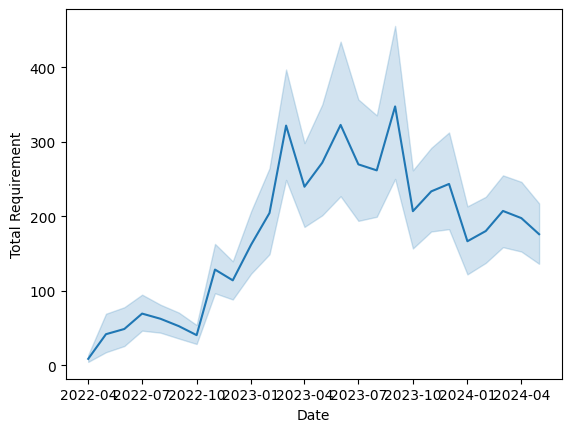

In [62]:
import seaborn as sns
sns.lineplot(x='Date',y='Total Requirement',data=pivot_table)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

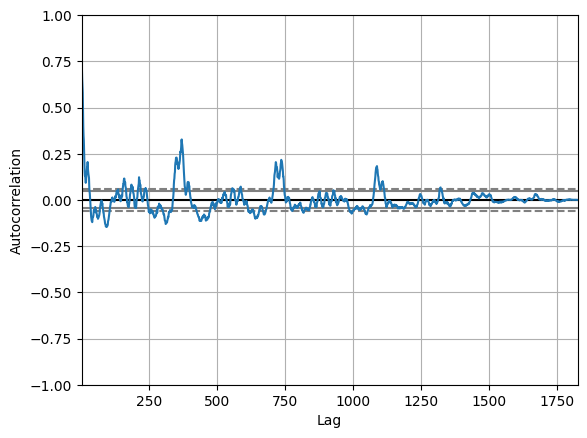

In [63]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(pivot_table['Total Requirement'])

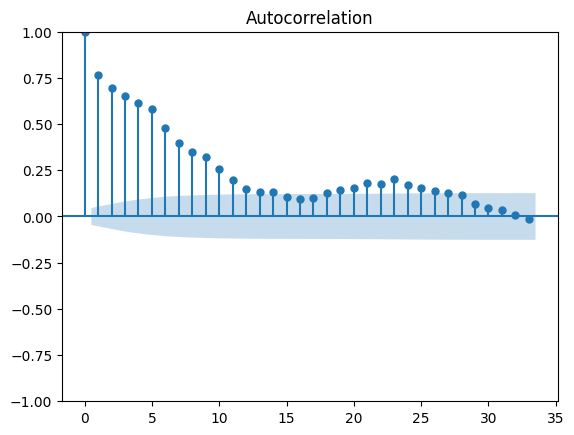

In [64]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(pivot_table['Total Requirement'])
plt.show()

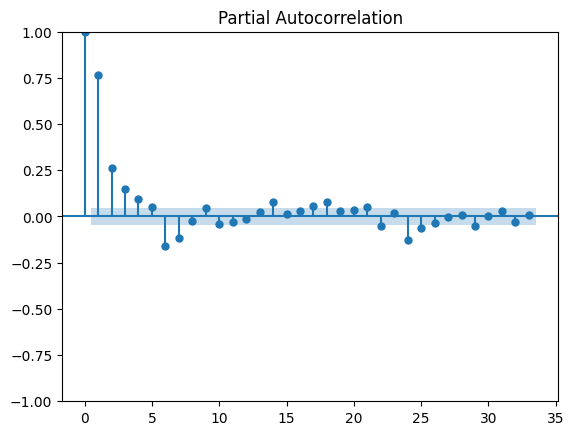

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(pivot_table['Total Requirement'])
plt.show()

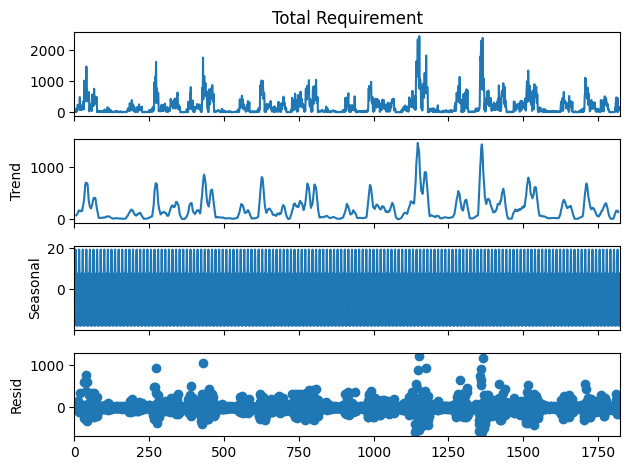

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(pivot_table['Total Requirement'],model='additive',period=12)
decomposition.plot()
plt.show()

In [67]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(pivot_table["Total Requirement"], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)



1. ADF :  -6.629160028537668
2. P-Value :  5.77342848727761e-09
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1799
5. Critical Values :
	 1% :  -3.433990164137254
	 5% :  -2.8631479299063405
	 10% :  -2.567626009684832


In [83]:
import pmdarima as pmd

model=pmd.auto_arima(pivot_table['Total Requirement'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=24051.092, Time=11.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=25859.337, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=24244.539, Time=1.35 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=24978.819, Time=5.73 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=26585.106, Time=0.04 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=24050.337, Time=4.81 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=24068.866, Time=1.02 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=24052.042, Time=15.10 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=24049.803, Time=5.47 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=24051.696, Time=11.49 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=24051.877, Time=19.14 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=24976.295, Time=4.95 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=24051.424, Time=6.77 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=24051.341, Time=5.60 sec
 

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima=SARIMAX(pivot_table['Total Requirement'],order=(4,0,4),seasonal_order=(2,0,2,12))
predicted=sarima.fit().predict();predicted

c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0         0.000000
1         5.029907
2        12.345160
3        43.513195
4        55.540680
           ...    
1820     80.161050
1821    118.258322
1822     74.898851
1823     83.255823
1824    119.552063
Name: predicted_mean, Length: 1825, dtype: float64

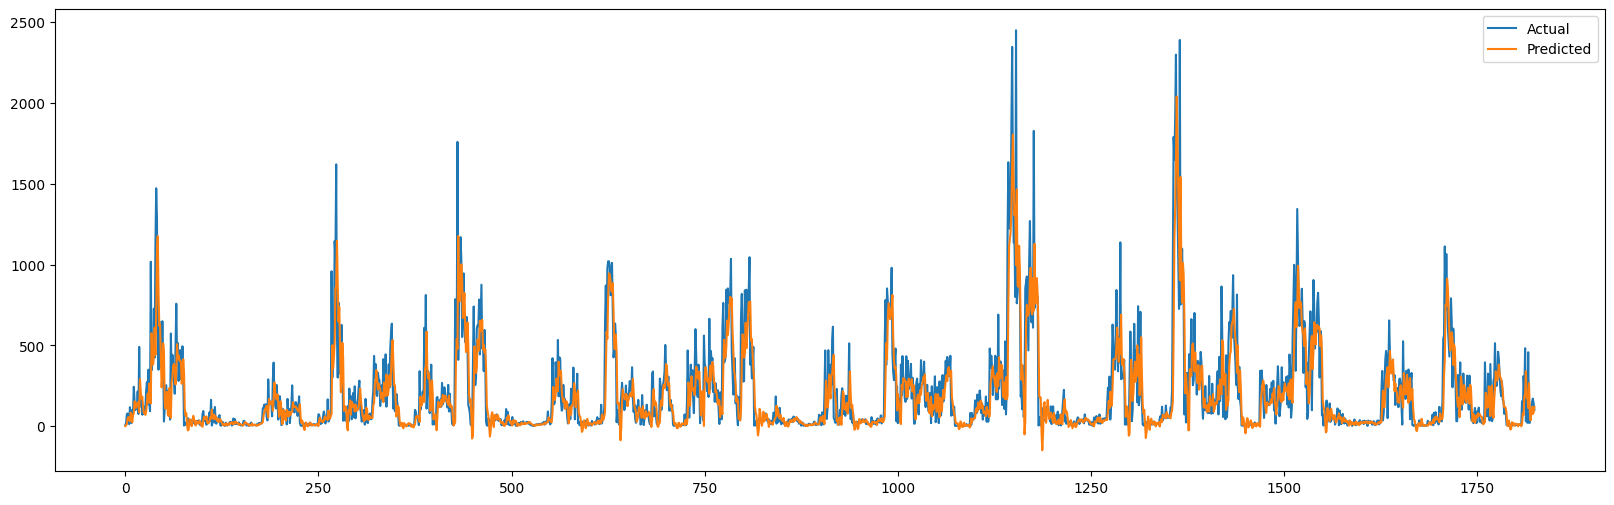

In [95]:
plt.figure(figsize=(20,6))
plt.plot(pivot_table['Total Requirement'],label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [96]:
resid=pivot_table['Total Requirement']-predicted;resid
mae=abs(resid.mean());mae

18.592901476776717

In [97]:
# Calculate RMSE
import numpy as np
from sklearn.metrics import r2_score

rmse_test = r2_score(pivot_table['Total Requirement'], predicted)
print("Root Mean Squared Error on test data:", rmse_test)

Root Mean Squared Error on test data: 0.6383345340310285


In [98]:
l=pd.DataFrame({"Pred":predicted})
l.to_csv("3.csv")

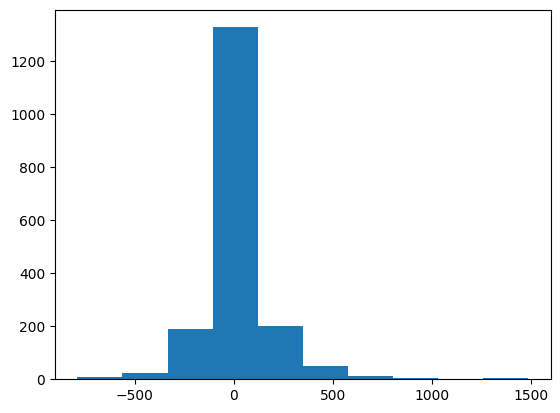

In [99]:
plt.hist(resid)
plt.show()
#residuals follow Normal distribution

In [100]:
(resid**2).mean() #mse

30103.44983257801

In [101]:
sarima1=SARIMAX(pivot_table['Total Requirement'],order=(5,0,0),seasonal_order=(1,0,0,12))
predicted1=sarima1.fit().predict();predicted1

0         0.000000
1         5.021236
2        12.287058
3        42.715716
4        55.698450
           ...    
1820     52.306506
1821    107.469348
1822     75.434383
1823    126.916366
1824     93.038725
Name: predicted_mean, Length: 1825, dtype: float64

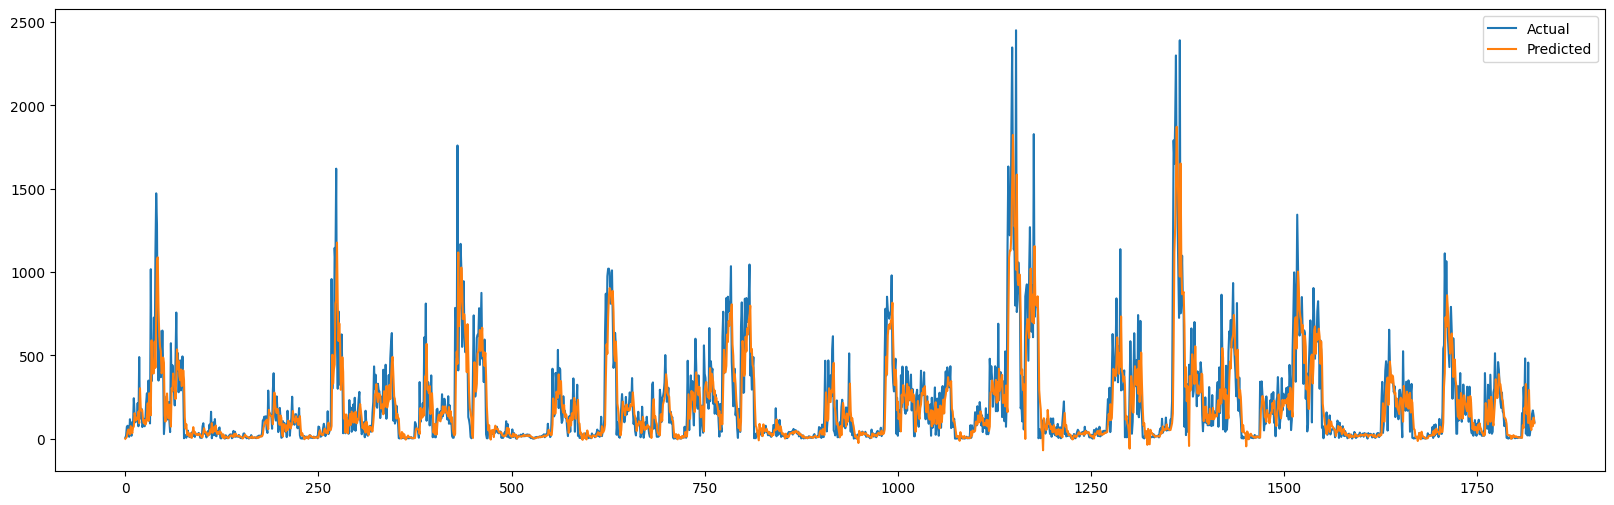

In [102]:
plt.figure(figsize=(20,6))
plt.plot(pivot_table['Total Requirement'],label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()

In [103]:
resid1=pivot_table['Total Requirement']-predicted1;resid1
mae1=abs(resid1.mean());mae1

14.864761553087893

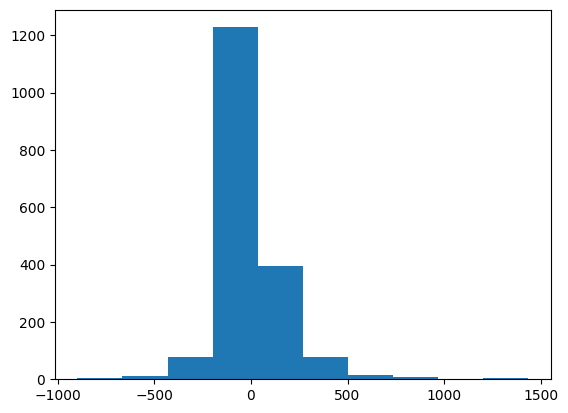

In [104]:
plt.hist(resid1)
plt.show()

In [105]:
import scipy.stats

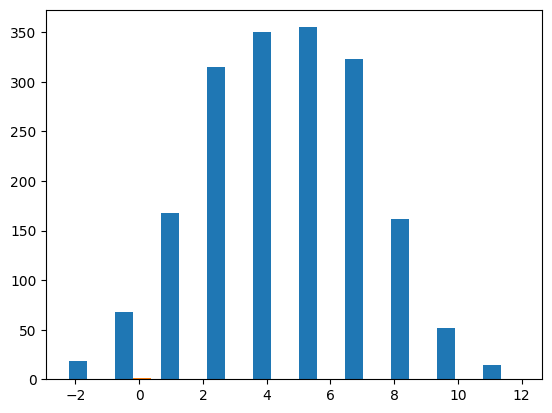

In [106]:
resid11=scipy.stats.boxcox(abs(resid1))
plt.hist(resid11)
plt.show()

In [107]:
(resid1**2).mean() #mse

30861.61550214133

In [109]:
def sarima_forecast(clinic_df, medicine_name):
    medicine_data = clinic_df[clinic_df['Medicine Name'] == medicine_name]['Total Requirement']
    
    model = SARIMAX(medicine_data, order=(0, 1, 2), seasonal_order=(1, 0, 0, 12))
    
    results = model.fit(disp=False)
    forecast = results.get_forecast(steps=1)
    forecast_value = forecast.predicted_mean.iloc[0]
 
    return forecast_value

# List of medicines
medicines = clinic_a_df['Medicine Name'].unique()

# Dictionary to store forecasts for each clinic
clinic_forecasts = {}

# Forecast for each medicine in each clinic
for clinic_name, clinic_df in clinic_dfs.items():
    forecasts = {}
    for med in medicines:
        forecast_june = sarima_forecast(clinic_df, med)
        forecasts[med] = forecast_june
    clinic_forecasts[clinic_name] = forecasts

# Display the forecasted values for June for each clinic and medicine
for clinic, forecasts in clinic_forecasts.items():
    print(f"\nForecasts for {clinic}:")
    for med, forecast in forecasts.items():
        print(f'  Forecast for {med} in June: {forecast:.2f}')



c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in


Forecasts for ECUR001 AMTALA SOUTH 24 PARGANAS:
  Forecast for Amoxycillin 250 mg Caps in June: 104.96
  Forecast for Calcium + Vit D3 250iu Tabs in June: 515.48
  Forecast for Cap Becosule in June: 370.46
  Forecast for Cetrizine 10mg  Tabs in June: 26.74
  Forecast for Cetrizine 10mg film coated Tablets in June: 59.36
  Forecast for Cough Syrup in June: 21.56
  Forecast for Diclofenac Gel in June: 10.72
  Forecast for Iron Tablet in June: 128.71
  Forecast for Miconazole Nitrate cream in June: 112.13
  Forecast for Multivitamin Syrup in June: 7.79
  Forecast for ORS Solution in June: 53.95
  Forecast for Omeprazole 20mg Capsules in June: 539.27
  Forecast for Paracetamol 500mg Tab in June: 161.35
  Forecast for Pediatric Cough Syrup in June: 95.78
  Forecast for Ranitidine HCl. 150 mg  Tabs in June: 277.99
  Forecast for Tab Aceclo 100mg+ PCM 325mg (SOS) in June: 154.05
  Forecast for tab Fluconazole 150mg in June: 6.94
  Forecast for tab Neurobion forte in June: 238.32

Forecasts f

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [110]:
# Convert forecast data to DataFrame
forecast_df = pd.DataFrame.from_dict(clinic_forecasts)
forecast_df.index.name = 'Medicine Name'

# Save DataFrame to CSV
forecast_df.to_csv('clinic_forecasts1.csv')

# Display the forecasted values for June for each clinic and medicine
print("Forecasted values for June saved to clinic_forecasts1.csv.")

Forecasted values for June saved to clinic_forecasts1.csv.
